In [192]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import math
import pandas
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [72]:
indicators = pandas.read_csv('project data/climate change dataset - worldbank/data - indicators.csv', encoding = "ISO-8859-1")

In [73]:
indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.059000,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,43778.000000,43819.000000,44057.000000,44348.000000,44665.000000,44979.000000,45296.000000,45616.000000,45948.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.626205,0.093611,0.541674,0.658336,0.712259,0.700552,0.702301,0.703980,0.725179,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101669.000000,102046.000000,102560.000000,103159.000000,103774.000000,104341.000000,104872.000000,105366.000000,105845.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,NaN


In [74]:
temperature = pandas.read_csv('project data/climate change dataset - worldbank/data - temperature.csv')

In [75]:
temperature.head(12)

,Temperature - (Celsius),Year,Statistics,Country,Country Code
0,-0.03110,1991,Jan Average,Afghanistan,AFG
1,1.43654,1991,Feb Average,Afghanistan,AFG
2,6.88685,1991,Mar Average,Afghanistan,AFG
3,12.93970,1991,Apr Average,Afghanistan,AFG
4,17.07550,1991,May Average,Afghanistan,AFG
5,23.07770,1991,Jun Average,Afghanistan,AFG
6,25.57100,1991,Jul Average,Afghanistan,AFG
7,23.96730,1991,Aug Average,Afghanistan,AFG
8,19.38000,1991,Sep Average,Afghanistan,AFG
9,12.87790,1991,Oct Average,Afghanistan,AFG


In [76]:
rainfall = pandas.read_csv('project data/climate change dataset - worldbank/data - rainfall.csv', encoding = "ISO-8859-1")

In [77]:
try:
    del rainfall['Unnamed: 5']
except:
    pass
rainfall.head(12)

,Rainfall - (MM),Year,Statistics,Country,Code
0,64.77650,1991,Jan Average,Afghanistan,AFG
1,59.40250,1991,Feb Average,Afghanistan,AFG
2,119.62500,1991,Mar Average,Afghanistan,AFG
3,51.80250,1991,Apr Average,Afghanistan,AFG
4,57.24380,1991,May Average,Afghanistan,AFG
5,5.58788,1991,Jun Average,Afghanistan,AFG
6,4.39142,1991,Jul Average,Afghanistan,AFG
7,4.66582,1991,Aug Average,Afghanistan,AFG
8,12.63480,1991,Sep Average,Afghanistan,AFG
9,4.09568,1991,Oct Average,Afghanistan,AFG


In [78]:
# code to convert the indicators to following format 
'''
    SN      Country        Country Code        Year          % of Agricultural land        Forest Area
    1       Nepal          NEP                 2019           10 
'''

data = {}
rows = []

# print(indicators['Indicator Name'].unique())          

'\n    SN      Country        Country Code        Year          % of Agricultural land        Forest Area\n    1       Nepal          NEP                 2019           10 \n'

In [79]:
columns_controls = [
    'Population growth (annual %)',
    'Agricultural land (sq. km)',
    'Forest area (sq. km)',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
    'Methane emissions (kt of CO2 equivalent)',
    'CO2 emissions (kt)',
    'Energy use (kg of oil equivalent per capita)',
    'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
    'Mortality rate, under-5 (per 1,000 live births)',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
    'Cereal yield (kg per hectare)',
    'Agricultural irrigated land (% of total agricultural land)',
    'Forest area (sq. km)'
]

columns = ['Country Name', 'Country Code']
indicator_names = []
for index, row in indicators.iterrows():
    if row['Indicator Name'] not in columns_controls:
        continue
        
    if row['Indicator Name'] not in columns:
        columns.append(row['Indicator Name'])
        
    if row['Indicator Name'] not in indicator_names:
        indicator_names.append(row['Indicator Name'])

columns.append('Year')
# MAKE THE DATAFRAME
new_indicators = pandas.DataFrame([], columns=columns)

previous_country = None
rows = []

        
for index, row in indicators.iterrows():
    if row['Indicator Name'] not in columns_controls:
        continue
    
    if row['Country Name'] != previous_country:
        if previous_country is not None:
            for year in range(1991, 2020): 
                insert_data  = {
                    'Country Name': data['Country Name'],
                    'Country Code': data['Country Code'],
                    'Year': str(year)
                }

                for indicator in data[str(year)]:
                    insert_data[indicator] = data[str(year)][indicator]

                new_indicators = new_indicators.append(insert_data , ignore_index=True)
        previous_country = row['Country Name']
                
        data = {
            'Country Name': '',
            'Country Code': ''    
        }

        for year in range(1991, 2020):
            data[str(year)] = {}
            for each_col in indicator_names:
                data[str(year)][each_col] = ''
        
    data ['Country Name'] = row ['Country Name']
    data ['Country Code'] = row ['Country Code']
    
    for year in range(1991, 2020): 
        data[str(year)][row['Indicator Name']] = row[str(year)]

for year in range(1991, 2020): 
    insert_data  = {
        'Country Name': data['Country Name'],
        'Country Code': data['Country Code'],
        'Year': str(year)
    }

    for indicator in data[str(year)]:
        insert_data[indicator] = data[str(year)][indicator]

    new_indicators = new_indicators.append(insert_data , ignore_index=True)

In [80]:
print(indicator_names)  

['Population growth (annual %)', 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)', 'Mortality rate, under-5 (per 1,000 live births)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)', 'Energy use (kg of oil equivalent per capita)', 'Cereal yield (kg per hectare)', 'Agricultural irrigated land (% of total agricultural land)', 'Forest area (sq. km)', 'Agricultural land (sq. km)']


In [81]:
new_indicators

,Country Name,Country Code,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,Aruba,ABW,3.902018,NaN,NaN,NaN,NaN,11.862274,15.4860,1683.153,NaN,NaN,NaN,4.2000,20.0,1991
1,Aruba,ABW,5.440272,NaN,NaN,NaN,NaN,12.133462,15.8980,1463.133,NaN,NaN,NaN,4.2000,20.0,1992
2,Aruba,ABW,6.068410,NaN,NaN,NaN,NaN,12.684115,16.3861,1595.145,NaN,NaN,NaN,4.2000,20.0,1993
3,Aruba,ABW,5.625998,NaN,NaN,NaN,NaN,13.239976,16.8768,1613.480,NaN,NaN,NaN,4.2000,20.0,1994
4,Aruba,ABW,4.616675,NaN,NaN,0.505997,NaN,13.292831,17.2964,1668.485,NaN,NaN,NaN,4.2000,20.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,Zimbabwe,ZWE,1.663813,NaN,54.3,8.284247,NaN,NaN,NaN,NaN,NaN,558.2,NaN,140620.0000,162000.0,2015
7652,Zimbabwe,ZWE,1.549759,NaN,50.4,7.873986,NaN,NaN,NaN,NaN,NaN,581.8,NaN,137495.9961,162000.0,2016
7653,Zimbabwe,ZWE,1.460061,NaN,49.3,9.663428,NaN,NaN,NaN,NaN,NaN,616.0,NaN,NaN,NaN,2017
7654,Zimbabwe,ZWE,1.410783,NaN,46.2,12.081949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [82]:
# find rainfall average across different year in different month

data = {}
countries = []

for index, row in rainfall.iterrows():
    row = dict(row)
    # print(row)
    
    key = ''   + str(row[' Year']) + ' - ' 
    key += str(row[' Statistics']).replace('Average','').strip()

    if key not in data:
        data [key] = row['Rainfall - (MM)']
    else:
        data [key] += row['Rainfall - (MM)']
    
    if row[' Country'] not in countries:
        countries.append(row[' Country'])

# count unique data
count = len(countries)

# perform average for all years
for each_year in data:
    data[each_year] = data[each_year] / count

# print(data)

In [83]:
rainfall_df = pandas.DataFrame(columns =['Year', 'Month', 'Rainfall'])

for each_data in data:
    year, month, rf = each_data.split(' - ')[0], each_data.split(' - ')[1], data[each_data]
    rainfall_df = rainfall_df.append({'Year' : year , 'Month' : month, 'Rainfall': rf} , ignore_index=True)

rainfall_df[rainfall_df['Month']=='Dec'].head(30)

,Year,Month,Rainfall
11,1991,Dec,89.675973
23,1992,Dec,95.032257
35,1993,Dec,95.115177
47,1994,Dec,88.516055
59,1995,Dec,96.956360
71,1996,Dec,90.675354
83,1997,Dec,95.736883
95,1998,Dec,105.974799
107,1999,Dec,102.214666
119,2000,Dec,98.330999


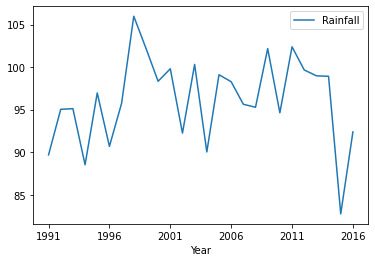

In [84]:
# rainfall_df[rainfall_df['Month']=='Jan'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Feb'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Mar'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Apr'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='May'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Jun'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Jul'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Aug'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Sep'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Oct'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Nov'].plot.line(x='Year', y='Rainfall')
rainfall_df[rainfall_df['Month']=='Dec'].plot.line(x='Year', y='Rainfall')

,Rainfall - (MM),Year,Statistics,Country,Code
0,64.7765,1991,Jan Average,Afghanistan,AFG
12,75.1985,1992,Jan Average,Afghanistan,AFG
24,47.9213,1993,Jan Average,Afghanistan,AFG
36,50.3801,1994,Jan Average,Afghanistan,AFG
48,13.7274,1995,Jan Average,Afghanistan,AFG


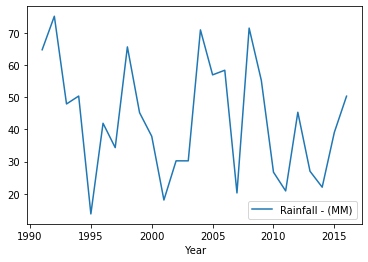

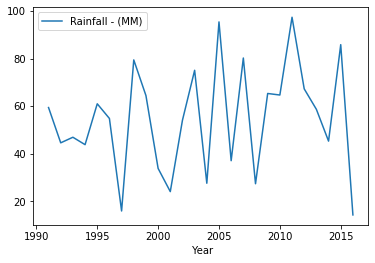

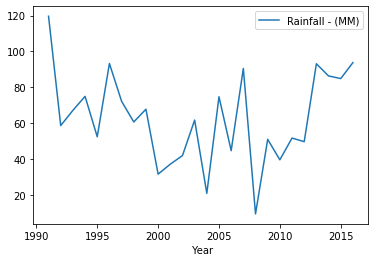

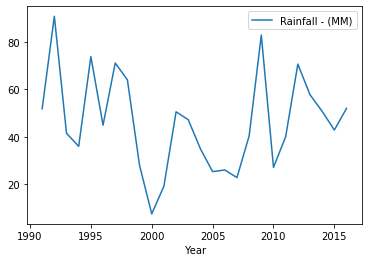

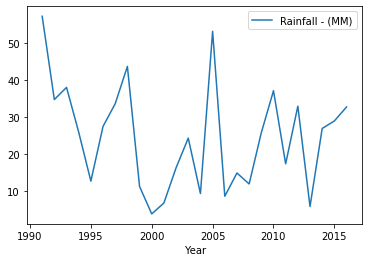

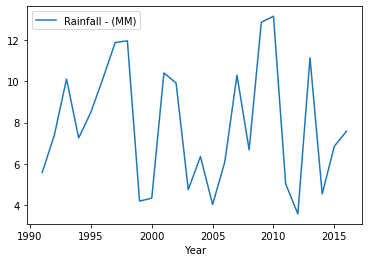

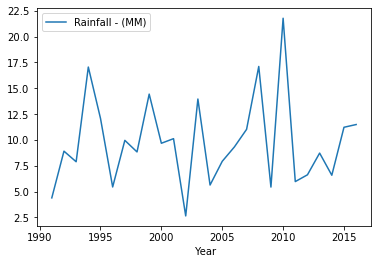

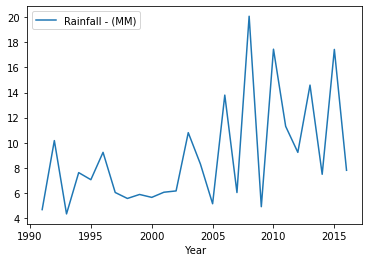

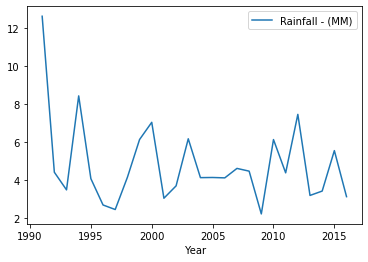

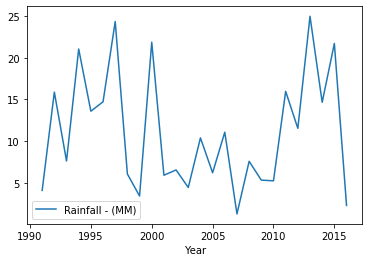

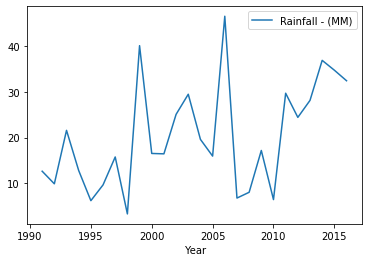

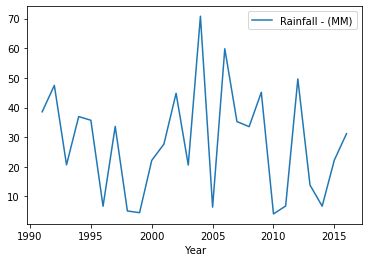

In [85]:
# Plot rainfall pattern in Afghanistan for all months in year
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Jan Average')].head()
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Jan Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Feb Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Mar Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Apr Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' May Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Jun Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Jul Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Aug Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Sep Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Oct Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Nov Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Dec Average')].plot.line(x=' Year', y='Rainfall - (MM)')

,Rainfall - (MM),Year,Statistics,Country,Code
38064,24.6078,1991,Jan Average,Nepal,NPL
38076,22.9484,1992,Jan Average,Nepal,NPL
38088,23.4321,1993,Jan Average,Nepal,NPL
38100,36.3310,1994,Jan Average,Nepal,NPL
38112,41.3874,1995,Jan Average,Nepal,NPL


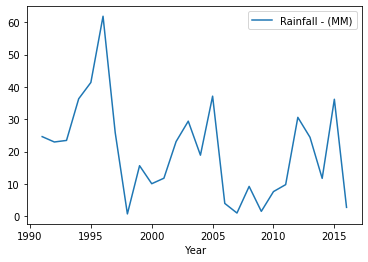

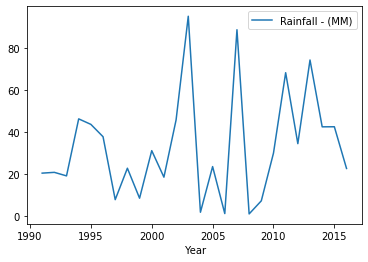

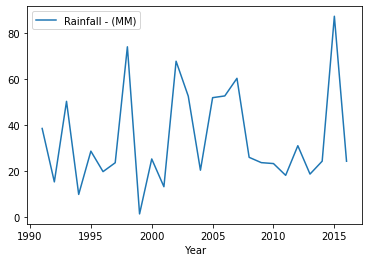

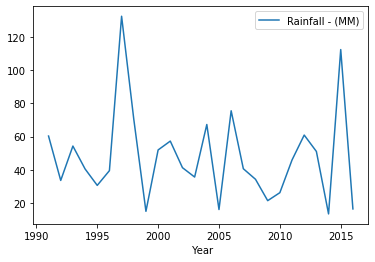

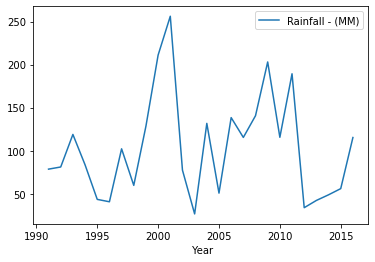

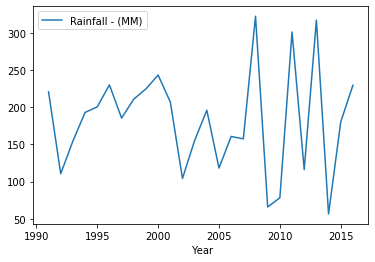

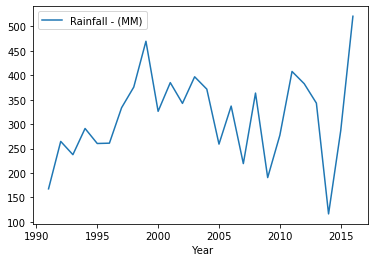

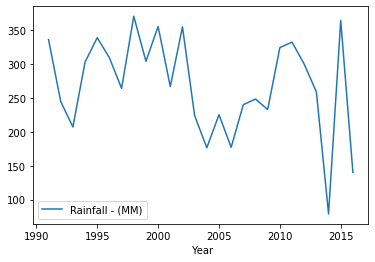

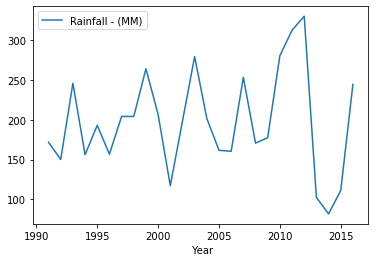

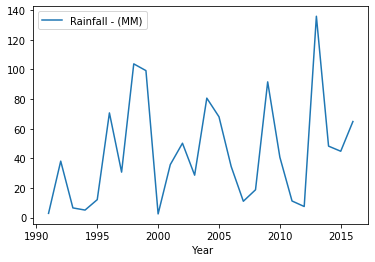

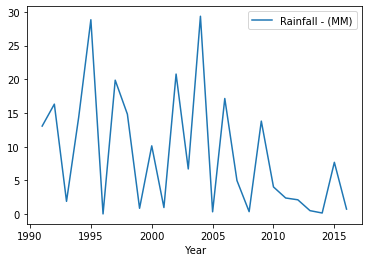

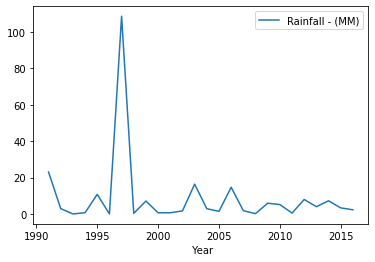

In [86]:
# Plot rainfall pattern in Nepal for all months in year
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jan Average')].head()
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jan Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Feb Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Mar Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Apr Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' May Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jun Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jul Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Aug Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Sep Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Oct Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Nov Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Dec Average')].plot.line(x=' Year', y='Rainfall - (MM)')

In [87]:
rainfall['Code'].unique()

array([' AFG', ' ALB', ' DZA', ' AND', ' AGO', ' ATG', ' ARG', ' ARM',
       ' AUS', ' AUT', ' AZE', ' The', ' BHR', ' BGD', ' BRB', ' BLR',
       ' BEL', ' BLZ', ' BEN', ' BTN', ' BOL', ' BIH', ' BWA', ' BRA',
       ' BRN', ' BGR', ' BFA', ' BDI', ' KHM', ' CMR', ' CAN', ' CPV',
       ' CAF', ' TCD', ' CHL', ' CHN', ' COL', ' COM', ' COD', ' COG',
       ' CRI', ' CIV', ' HRV', ' CUB', ' CYP', ' CZE', ' DNK', ' DJI',
       ' DMA', ' DOM', ' ECU', ' EGY', ' SLV', ' GNQ', ' ERI', ' EST',
       ' ETH', ' FRO', ' FSM', ' FJI', ' FIN', ' FRA', ' GAB', ' GMB',
       ' GEO', ' DEU', ' GHA', ' GRC', ' GRL', ' GRD', ' GTM', ' GIN',
       ' GNB', ' GUY', ' HTI', ' HND', ' HUN', ' ISL', ' IND', ' IDN',
       ' IRN', ' IRQ', ' IRL', ' ISR', ' ITA', ' JAM', ' JPN', ' JOR',
       ' KAZ', ' KEN', ' KIR', ' PRK', ' KOR', ' KWT', ' KGZ', ' LAO',
       ' LVA', ' LBN', ' LSO', ' LBR', ' LBY', ' LIE', ' LTU', ' LUX',
       ' MKD', ' MDG', ' MWI', ' MYS', ' MDV', ' MLI', ' MLT', ' MHL',
      

In [88]:
rainfall.head()

,Rainfall - (MM),Year,Statistics,Country,Code
0,64.7765,1991,Jan Average,Afghanistan,AFG
1,59.4025,1991,Feb Average,Afghanistan,AFG
2,119.6250,1991,Mar Average,Afghanistan,AFG
3,51.8025,1991,Apr Average,Afghanistan,AFG
4,57.2438,1991,May Average,Afghanistan,AFG


In [89]:
new_indicators.head()

,Country Name,Country Code,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,Aruba,ABW,3.902018,NaN,NaN,NaN,NaN,11.862274,15.4860,1683.153,NaN,NaN,NaN,4.2,20.0,1991
1,Aruba,ABW,5.440272,NaN,NaN,NaN,NaN,12.133462,15.8980,1463.133,NaN,NaN,NaN,4.2,20.0,1992
2,Aruba,ABW,6.068410,NaN,NaN,NaN,NaN,12.684115,16.3861,1595.145,NaN,NaN,NaN,4.2,20.0,1993
3,Aruba,ABW,5.625998,NaN,NaN,NaN,NaN,13.239976,16.8768,1613.480,NaN,NaN,NaN,4.2,20.0,1994
4,Aruba,ABW,4.616675,NaN,NaN,0.505997,NaN,13.292831,17.2964,1668.485,NaN,NaN,NaN,4.2,20.0,1995


In [90]:
new_indicators['Country Code'] = new_indicators['Country Code'].apply(lambda x: str(x).strip())
rainfall['Code'] = rainfall['Code'].apply(lambda x: x.strip())
rainfall[' Statistics'] = rainfall[' Statistics'].apply(lambda x: str(x).strip())

rainfall[' Year'] = rainfall[' Year'].apply(lambda x: str(int(x)))
new_indicators['Year'] = new_indicators['Year'].apply(lambda x: str(int(x)))

result_rainfall = rainfall.merge(
    new_indicators, left_on=['Code', ' Year'], 
    right_on=['Country Code', 'Year'], 
    how='inner'
)

In [91]:
result_rainfall.head()

,Rainfall - (MM),Year,Statistics,Country,Code,Country Name,Country Code,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)",...,"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,64.7765,1991,Jan Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
1,59.4025,1991,Feb Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
2,119.6250,1991,Mar Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
3,51.8025,1991,Apr Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
4,57.2438,1991,May Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991


In [92]:
new_indicators.describe()

,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km)
count,7344.000000,1527.000000,6692.000000,6260.000000,168.000000,5.506000e+03,5.484000e+03,5.887000e+03,4494.000000,5973.000000,856.000000,6.639000e+03,6.542000e+03
mean,1.454340,12.486876,50.426566,12.856599,1.169905,1.222353e+05,2.925721e+05,9.707150e+05,2300.399953,2908.635500,10.075554,1.625996e+06,1.944396e+06
std,1.448780,18.784362,50.925153,11.828669,1.955153,3.550384e+05,8.910158e+05,3.211270e+06,2708.138688,2255.679544,12.495702,4.955546e+06,5.625352e+06
min,-10.955149,0.000000,1.700000,0.024859,0.000000,0.000000e+00,0.000000e+00,7.334000e+00,0.000000,34.300000,0.000000,0.000000e+00,3.000000e+00
25%,0.528279,0.500000,12.000000,3.438151,0.020186,5.877677e+02,2.082185e+03,1.668485e+03,602.809049,1442.600000,1.232229,3.323000e+03,5.520000e+03
50%,1.346710,3.300000,29.600000,9.055925,0.253744,4.572756e+03,1.095110e+04,1.755026e+04,1280.873666,2423.950423,5.266499,3.599900e+04,5.455000e+04
75%,2.354946,16.000000,76.398238,19.703113,1.265462,2.870698e+04,7.364995e+04,2.090899e+05,3047.753898,3812.100000,13.376356,2.492180e+05,4.568200e+05
max,17.510948,94.100000,321.900000,79.042362,9.226586,3.260053e+06,8.014067e+06,3.613828e+07,22120.371570,28130.100000,59.711493,4.121003e+07,4.891167e+07


In [101]:
result_rainfall.columns
pearsoncorr = result_rainfall[[
        'Rainfall - (MM)',
        'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
        'Methane emissions (kt of CO2 equivalent)',
        'CO2 emissions (kt)',
        'Energy use (kg of oil equivalent per capita)'
]].corr(method='pearson')

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', 'Code',
       'Country Name', 'Country Code', 'Population growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)',
       'Energy use (kg of oil equivalent per capita)',
       'Cereal yield (kg per hectare)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Forest area (sq. km)', 'Agricultural land (sq. km)', 'Year'],
      dtype='object')

In [102]:
pearsoncorr

,Rainfall - (MM),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita)
Rainfall - (MM),1.000000,-0.056698,-0.062854,-0.075295,-0.133341
Nitrous oxide emissions (thousand metric tons of CO2 equivalent),-0.056698,1.000000,0.954026,0.864990,0.027638
Methane emissions (kt of CO2 equivalent),-0.062854,0.954026,1.000000,0.847190,0.017852
CO2 emissions (kt),-0.075295,0.864990,0.847190,1.000000,0.133652
Energy use (kg of oil equivalent per capita),-0.133341,0.027638,0.017852,0.133652,1.000000


Index(['Rainfall - (MM)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)',
       'Energy use (kg of oil equivalent per capita)'],
      dtype='object')


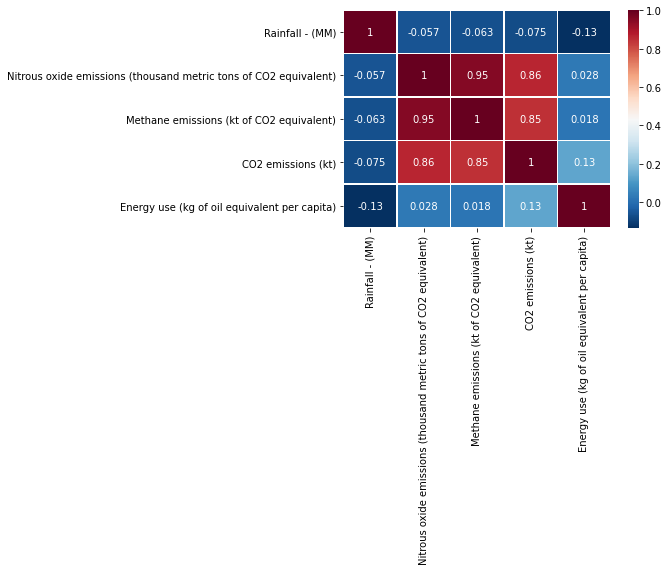

In [103]:
print(pearsoncorr.columns)

import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [26]:
temperature.describe()

,Temperature - (Celsius),Year
count,61152.000000,61152.000000
mean,19.224302,2003.500000
std,10.136161,7.500061
min,-30.859000,1991.000000
25%,13.824000,1997.000000
50%,23.322650,2003.500000
75%,26.244025,2010.000000
max,38.566900,2016.000000


In [121]:
temperature['Country Code'] = temperature['Country Code'].apply(lambda x: x.strip())
new_indicators['Country Code'] = new_indicators['Country Code'].apply(lambda x: x.strip())
new_indicators['Year'] = new_indicators['Year'].astype('int')
temperature[' Statistics'] = temperature[' Statistics'].apply(lambda x: str(x).strip())

result_temp = temperature.merge(
    new_indicators, left_on=['Country Code', ' Year'], 
    right_on=['Country Code', 'Year'], 
    how='inner'
)

In [122]:
result_temp.head()

,Temperature - (Celsius),Year,Statistics,Country,Country Code,Country Name,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,-0.03110,1991,Jan Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
1,1.43654,1991,Feb Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
2,6.88685,1991,Mar Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
3,12.93970,1991,Apr Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
4,17.07550,1991,May Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991


In [123]:
pearsoncorr = result_temp[[
        'Temperature - (Celsius)',
        'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
        'Methane emissions (kt of CO2 equivalent)',
        'CO2 emissions (kt)',
        'Energy use (kg of oil equivalent per capita)'
]].corr(method='pearson')

Index(['Temperature - (Celsius)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)',
       'Energy use (kg of oil equivalent per capita)'],
      dtype='object')


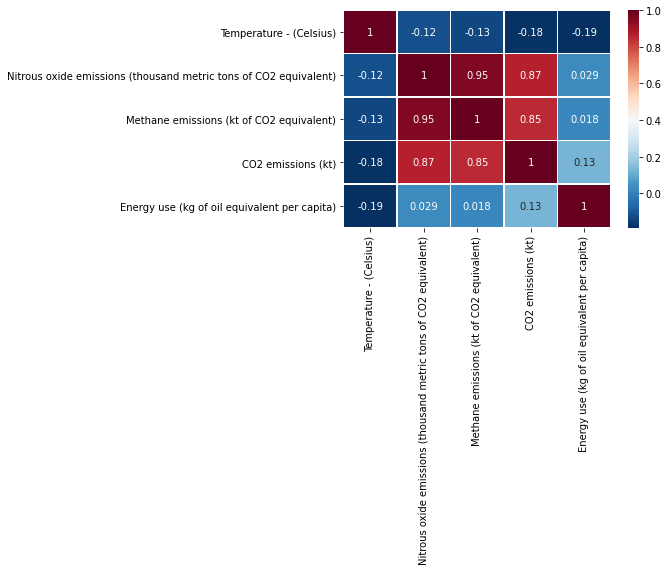

In [124]:
print(pearsoncorr.columns)

import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [125]:
# Tasks
'''
    a. For each countries, 
        i.  Analyze change in temperature dataset for each month
        ii. Analyze change in temperature dataset for overall year
        iii. Analyze CO2 and NO2 emission in these countries
        iv. K-means Cluster analysis based on custom indicators such as % change in CO2 production, %change in temperature
'''

'\n    a. For each countries, \n        i.  Analyze change in temperature dataset for each month\n        ii. Analyze change in temperature dataset for overall year\n        iii. Analyze CO2 and NO2 emission in these countries\n        iv. K-means Cluster analysis based on custom indicators such as % change in CO2 production, %change in temperature\n'

In [126]:
country_code_for_analysis = ['CHN', 'USA', 'RUS', 'IND', 'NPL', 'POL', 'CAN', 'AUS']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [127]:
temperature[(temperature[' Statistics'] == 'Jan Average') & (temperature['Country Code'] == 'CHN')].head()

,Temperature - (Celsius),Year,Statistics,Country,Country Code
10920,-8.0581,1991,Jan Average,China,CHN
10932,-7.6555,1992,Jan Average,China,CHN
10944,-8.9905,1993,Jan Average,China,CHN
10956,-7.5140,1994,Jan Average,China,CHN
10968,-8.3181,1995,Jan Average,China,CHN


In [128]:
country_monthly_temperature_data = {}
for each_country in country_code_for_analysis:
    country_monthly_temperature_data[each_country] = []

# Task 1. Analyze change in temperature dataset for each month
for each_country in country_code_for_analysis:
    for each_month in months:
        avg = temperature[
            (temperature[' Statistics'] == str(each_month) + ' Average') & 
            (temperature['Country Code'] == each_country)
        ]['Temperature - (Celsius)'].mean()
        
        country_monthly_temperature_data[each_country].append(avg)

In [129]:
country_monthly_temperature_data_df=pandas.DataFrame.from_dict(country_monthly_temperature_data,orient='index').transpose()
country_monthly_temperature_data_df['Month'] = months
country_monthly_temperature_data_df.set_index('Month', inplace=True)
country_monthly_temperature_data_df.head()

,CHN,USA,RUS,IND,NPL,POL,CAN,AUS
Month,,,,,,,,
Jan,-7.927631,-4.893523,-25.455462,17.295923,3.847042,-1.523544,-23.006692,28.314377
Feb,-4.364515,-2.884202,-23.267769,19.918585,5.582587,-0.281723,-21.883538,27.569715
Mar,1.524660,0.958290,-15.287923,24.268592,10.101127,3.473298,-17.429923,25.609608
Apr,8.503135,6.747283,-5.293050,28.049823,13.917542,8.593287,-8.713662,22.301742
May,13.587296,12.830377,4.065970,30.247012,16.745592,13.654200,0.493339,18.240396


Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Temperature')

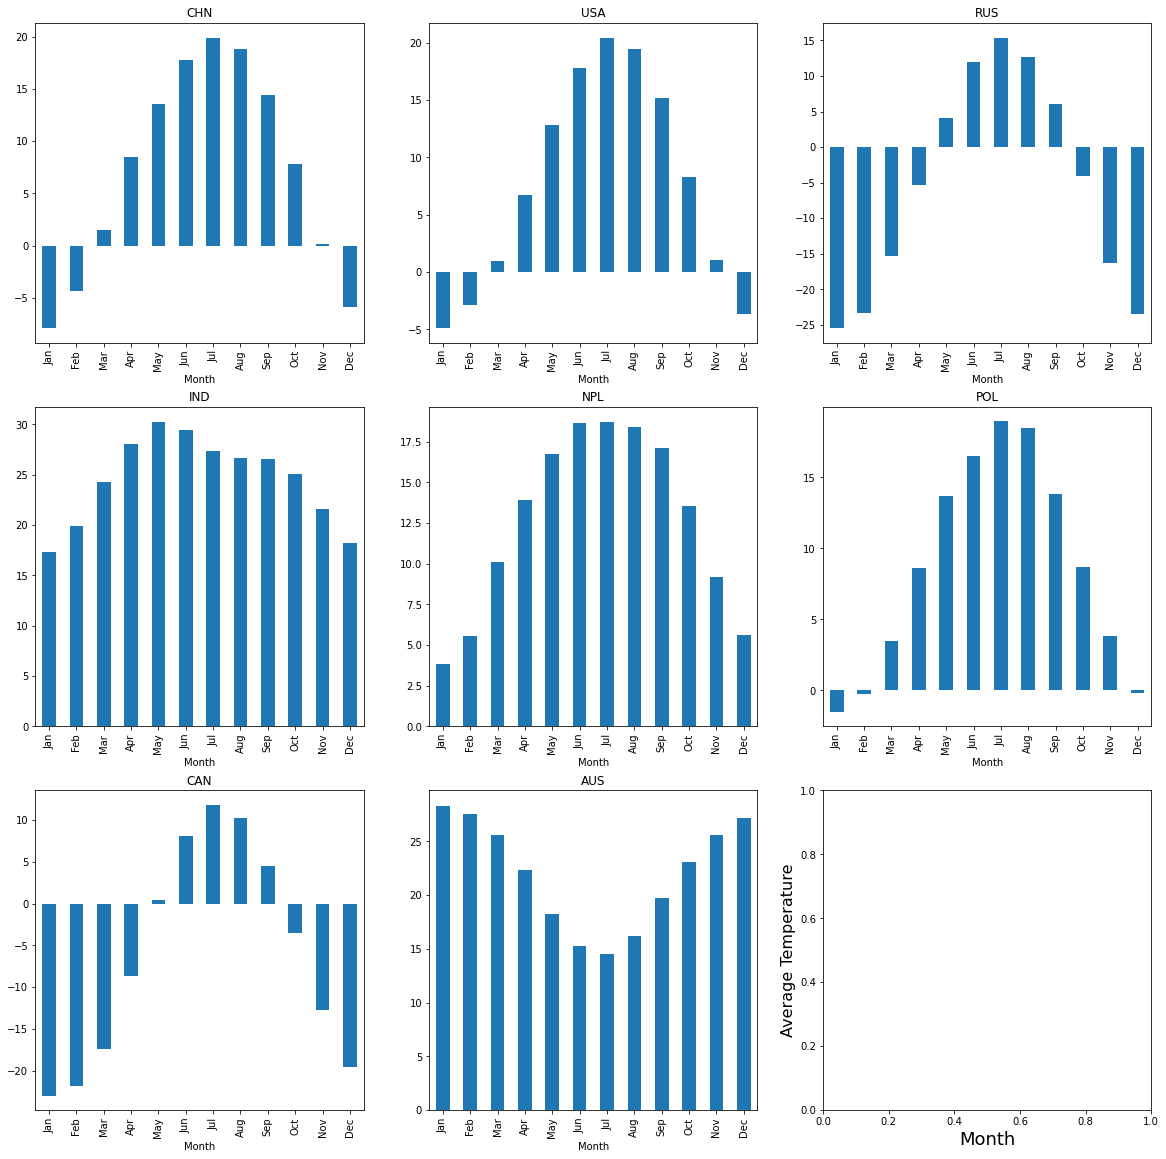

In [130]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Month', fontsize=18)
plt.ylabel('Average Temperature', fontsize=16)

for i in range(len(country_code_for_analysis)):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)
    country_monthly_temperature_data_df[country_code_for_analysis[i]].plot(
        ax=axes[ix],kind='bar', title=country_code_for_analysis[i])

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country',
       'Country Code'],
      dtype='object')

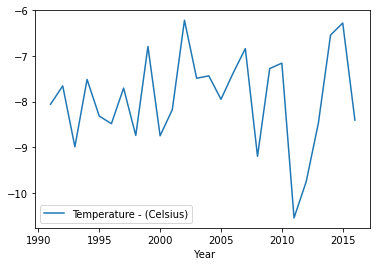

In [131]:
# Analyze temperature change for January for China
temperature.columns
temp_new = temperature[(temperature[' Statistics'] == 'Jan Average') &  (temperature['Country Code'] == 'CHN')][
    ['Temperature - (Celsius)', ' Year']]
temp_new.set_index(' Year', inplace=True)
temp_new.plot.line()

In [132]:
# Analyze % change in temperature data for January for the last 3 decades
temperature.columns

for month in months:
    m1 = temperature[
            (temperature[' Statistics'] == str(month) + ' Average') &  
            (temperature['Country Code'] == 'CHN') & 
            (temperature[' Year']  >1989) &
            (temperature[' Year']  < 2001)
        ]['Temperature - (Celsius)'].mean()

    m2 = temperature[
            (temperature[' Statistics'] == str(month) + ' Average') &  
            (temperature['Country Code'] == 'CHN') & 
            (temperature[' Year']  > 2000) &
            (temperature[' Year']  < 2011)
        ]['Temperature - (Celsius)'].mean()

    m3 = temperature[
            (temperature[' Statistics'] == str(month) + ' Average') &  
            (temperature['Country Code'] == 'CHN') & 
            (temperature[' Year']  > 2010) &
            (temperature[' Year']  < 2020)
        ]['Temperature - (Celsius)'].mean()

    print(month, m1, m2, m3, (m2-m1)/m1*100, (m3-m1)/m1*100)

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country',
       'Country Code'],
      dtype='object')

Jan -8.100719999999999 -7.510999999999998 -8.333533333333333 -7.279846729673421 2.8739832179526568
Feb -4.48024 -4.053660000000001 -4.689733333333334 -9.521364926878906 4.67593997940587
Mar 0.9498190000000001 1.914286 1.8333500000000003 101.5421885643475 93.02098610366818
Apr 8.201236999999999 8.562738 8.90696 4.407883835084885 8.6050799409894
May 13.470509999999999 13.765600000000001 13.484766666666665 2.1906371770630946 0.10583613142090657
Jun 17.49015 17.981260000000002 17.91675 2.8079233168383495 2.439087143334966
Jul 19.70023 20.099619999999998 20.114300000000004 2.027336736677677 2.1018536331809443
Aug 18.58692 18.991719999999997 19.201666666666664 2.1778756243637893 3.3074154656428565
Sep 14.215859999999997 14.738900000000001 14.461533333333334 3.679270898841179 1.728163708233875
Oct 7.406619999999999 8.090951 8.077276666666666 9.239450653604495 9.054827528166248
Nov -0.18990099999999996 0.40911400000000003 0.33003166666666667 -315.4354110826168 -273.79143167580304
Dec -5.820300

In [133]:
country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']

june_1990 = []
june_2000 = []
june_2010 = []

percentage_june_2000 = []
percentage_june_2010 = []

july_1990 = []
july_2000 = []
july_2010 = []

percentage_july_2000 = []
percentage_july_2010 = []

august_1990 = []
august_2000 = []
august_2010 = []

percentage_august_2000 = []
percentage_august_2010 = []

november_1990 = []
november_2000 = []
november_2010 = []

percentage_november_2000 = []
percentage_november_2010 = []

december_1990 = []
december_2000 = []
december_2010 = []

percentage_december_2000 = []
percentage_december_2010 = []

january_1990 = []
january_2000 = []
january_2010 = []

percentage_january_2000 = []
percentage_january_2010 = []

for each_country in country_code_for_analysis:
    for month in months:
        m1 = temperature[
                (temperature[' Statistics'] == str(month) + ' Average') &  
                (temperature['Country Code'] == each_country) & 
                (temperature[' Year']  >1989) &
                (temperature[' Year']  < 2001)
            ]['Temperature - (Celsius)'].mean()

        m2 = temperature[
                (temperature[' Statistics'] == str(month) + ' Average') &  
                (temperature['Country Code'] == each_country) & 
                (temperature[' Year']  > 2000) &
                (temperature[' Year']  < 2011)
            ]['Temperature - (Celsius)'].mean()

        m3 = temperature[
                (temperature[' Statistics'] == str(month) + ' Average') &  
                (temperature['Country Code'] == each_country) & 
                (temperature[' Year']  > 2010) &
                (temperature[' Year']  < 2020)
            ]['Temperature - (Celsius)'].mean()
        
        if month == 'Jun':
            june_1990.append(m1)
            june_2000.append(m2)
            june_2010.append(m3)
            
            percentage_june_2000.append((m2-m1)/m1*100)            
            percentage_june_2010.append((m3-m1)/m1*100)
        
        if month == 'Jul':
            july_1990.append(m1)
            july_2000.append(m2)
            july_2010.append(m3)
            
            percentage_july_2000.append((m2-m1)/m1*100)            
            percentage_july_2010.append((m3-m1)/m1*100)
        
        if month == 'Aug':            
            august_1990.append(m1)
            august_2000.append(m2)
            august_2010.append(m3)
            
            percentage_august_2000.append((m2-m1)/m1*100)            
            percentage_august_2010.append((m3-m1)/m1*100)
        
        if month == 'Nov':
            november_1990.append(m1)
            november_2000.append(m2)
            november_2010.append(m3)
            
            percentage_november_2000.append((m2-m1)/m1*100)            
            percentage_november_2010.append((m3-m1)/m1*100)
        
        if month == 'Dec':
            december_1990.append(m1)
            december_2000.append(m2)
            december_2010.append(m3)
            
            percentage_december_2000.append((m2-m1)/m1*100)            
            percentage_december_2010.append((m3-m1)/m1*100)
            
        if month == 'Jan':
            january_1990.append(m1)
            january_2000.append(m2)
            january_2010.append(m3)
            
            percentage_january_2000.append((m2-m1)/m1*100)            
            percentage_january_2010.append((m3-m1)/m1*100)


data_stats = {
    'country': country_code_for_analysis,
    'june_1990': june_1990, 
    'june_2000': june_2000, 
    'june_2010': june_2010, 
    'july_1990': july_1990, 
    'july_2000': july_2000,
    'july_2010': july_2010, 
    'august_1990': august_1990, 
    'august_2000': august_2000, 
    'august_2010': august_2010, 
    'november_1990':november_1990,
    'november_2000':november_2000,
    'november_2010':november_2010,
    'december_1990': december_1990,
    'december_2000': december_2000,
    'december_2010': december_2010,
    'january_1990': january_1990, 
    'january_2000': january_2000,
    'january_2010': january_2010
}

df_stat = pd.DataFrame(data=data_stats)

data_percentage ={
    'country': country_code_for_analysis,
    'percentage_june_2000': percentage_june_2000, 
    'percentage_june_2010': percentage_june_2010, 
    'percentage_july_2000': percentage_july_2000, 
    'percentage_july_2010': percentage_july_2010, 
    'percentage_august_2000': percentage_august_2000, 
    'percentage_august_2010': percentage_august_2010, 
    'percentage_november_2000':percentage_november_2000,
    'percentage_november_2010':percentage_november_2010,
    'percentage_december_2000': percentage_december_2000,
    'percentage_december_2010': percentage_december_2010,
    'percentage_january_2000': percentage_january_2000,
    'percentage_january_2010': percentage_january_2010
}


df_percentage = pd.DataFrame(data=data_percentage)

In [136]:
df_percentage.head()

,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010
0,AFG,1.751457,6.326181,1.218239,3.877877,1.826468,3.022545,4.791107,-6.245956,-17.067701,-23.037810,10.864381,160.120367
1,ALB,1.224828,2.273618,4.537126,5.787713,1.587604,4.911092,5.891520,13.001156,-0.481762,0.610916,13.235597,35.291330
2,DZA,1.766063,1.902554,2.354052,2.091291,0.652762,1.053353,0.853632,3.550871,1.795430,-0.477235,1.479689,5.303360
3,AND,8.924938,5.706145,2.892242,2.384314,-2.201155,-0.367138,2.038986,19.423065,-23.551342,8.252903,-2.864516,16.007828
4,AGO,1.589487,-0.037665,1.587331,1.719372,2.110719,0.038757,-0.251736,-0.382624,0.746580,0.745771,1.748728,0.371265


In [137]:
df_percentage.columns
df_stat.head()

Index(['country', 'percentage_june_2000', 'percentage_june_2010',
       'percentage_july_2000', 'percentage_july_2010',
       'percentage_august_2000', 'percentage_august_2010',
       'percentage_november_2000', 'percentage_november_2010',
       'percentage_december_2000', 'percentage_december_2010',
       'percentage_january_2000', 'percentage_january_2010'],
      dtype='object')

,country,june_1990,june_2000,june_2010,july_1990,july_2000,july_2010,august_1990,august_2000,august_2010,november_1990,november_2000,november_2010,december_1990,december_2000,december_2010,january_1990,january_2000,january_2010
0,AFG,23.23208,23.63898,24.701783,25.28076,25.58874,26.261117,23.90789,24.34456,24.630517,7.475850,7.834026,7.008912,3.367331,2.792605,2.591572,0.579895,0.642897,1.508425
1,ALB,19.31210,19.54864,19.751183,21.48805,22.46299,22.731717,21.85746,22.20447,22.930900,7.792115,8.251189,8.805180,3.730682,3.712709,3.753473,2.243790,2.540769,3.035653
2,DZA,31.66988,32.22919,32.272417,33.04642,33.82435,33.737517,32.78072,32.99470,33.126017,17.871860,18.024420,18.506467,13.578920,13.822720,13.514117,12.253930,12.435250,12.903800
3,AND,17.07586,18.59987,18.050233,20.29948,20.88659,20.783483,20.93946,20.47855,20.862583,7.604416,7.759469,9.081427,5.406885,4.133491,5.853110,4.266271,4.144063,4.949208
4,AGO,19.08037,19.38365,19.073183,18.65836,18.95453,18.979167,20.58114,21.01555,20.589117,23.473030,23.413940,23.383217,23.089290,23.261670,23.261483,22.944100,23.345330,23.029283


In [138]:
from sklearn import cluster
from mpl_toolkits.mplot3d import Axes3D

df_percentage_subset = df_percentage[[
       'country', 
       'percentage_june_2000', 'percentage_june_2010',
       'percentage_july_2000', 'percentage_july_2010',
       'percentage_august_2000', 'percentage_august_2010',
       'percentage_november_2000', 'percentage_november_2010',
       'percentage_december_2000', 'percentage_december_2010',
       'percentage_january_2000', 'percentage_january_2010'
]]
# df_stat_subset[df_stat_subset.isna().any(axis=1)]
df_percentage_subset = df_percentage_subset.dropna()


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


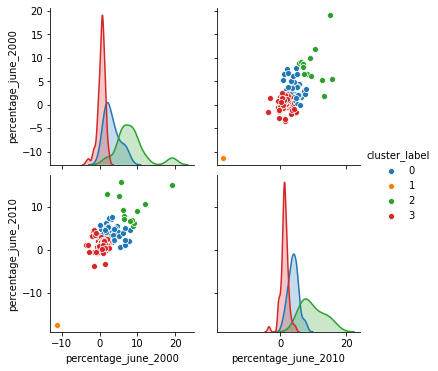

In [139]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_june_2000', 'percentage_june_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_june_2000', 'percentage_june_2010'])
data_plot

In [140]:
cluster_means = []

percentage_june_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_june_2000'].mean())
percentage_june_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_june_2010'].mean())

df_cluster_means = percentage_june_2000_mean.merge(percentage_june_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_june_2000  percentage_june_2010
cluster_label                                            
0                          3.258360              3.995683
1                        -11.269796            -17.324182
2                          8.297381              9.744282
3                          0.528608              1.309503


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
3,AND,8.924938,5.706145,2.892242,2.384314,-2.201155,-0.367138,2.038986,19.423065,-23.551342,8.252903,-2.864516,16.007828,2
34,CHL,1.987009,13.134982,5.406702,11.121075,-5.180363,4.363659,-2.193642,1.504265,0.104783,2.614846,1.301362,5.206344,2
57,FRO,9.148273,6.392809,6.266851,3.513148,3.979938,0.941648,3.502049,15.492747,25.753043,21.593213,6.593972,8.995704,2
77,ISL,19.168491,15.068632,6.244544,4.333338,6.050624,1.285512,-26.582599,-88.857223,-48.600496,-10.473379,-24.044061,-43.825664,2
94,KGZ,6.564173,7.959744,0.560905,6.015636,4.048853,6.042820,-42.215998,13.023800,8.243064,12.758633,-3.419145,-4.598269,2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


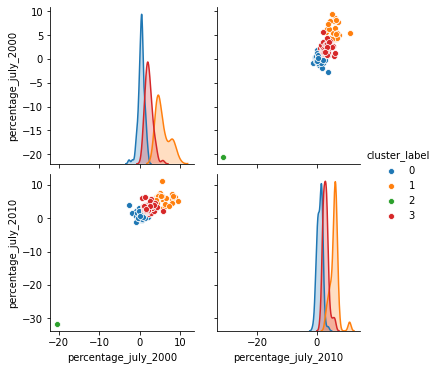

In [141]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_july_2000', 'percentage_july_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_july_2000', 'percentage_july_2010'])
data_plot

In [142]:
cluster_means = []

percentage_july_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_july_2000'].mean())
percentage_july_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_july_2010'].mean())

df_cluster_means = percentage_july_2000_mean.merge(percentage_july_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_july_2000  percentage_july_2010
cluster_label                                            
0                          0.402483              1.092128
1                          5.662374              5.968280
2                        -20.533680            -31.610776
3                          2.250455              3.067742


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
68,GRL,-11.269796,-17.324182,-20.53368,-31.610776,-21.458967,-19.7955,-0.162142,-3.243566,-10.709829,-5.360524,-8.645431,-15.767379,2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


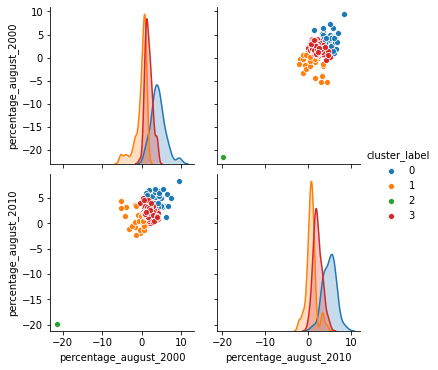

In [143]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_august_2000', 'percentage_august_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_august_2000', 'percentage_august_2010'])
data_plot

In [144]:
cluster_means = []

percentage_august_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_august_2000'].mean())
percentage_august_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_august_2010'].mean())

df_cluster_means = percentage_august_2000_mean.merge(percentage_august_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_august_2000  percentage_august_2010
cluster_label                                                
0                            4.139172                4.941596
1                           -0.132636                0.708370
2                          -21.458967              -19.795500
3                            1.756239                2.199486


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
68,GRL,-11.269796,-17.324182,-20.53368,-31.610776,-21.458967,-19.7955,-0.162142,-3.243566,-10.709829,-5.360524,-8.645431,-15.767379,2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

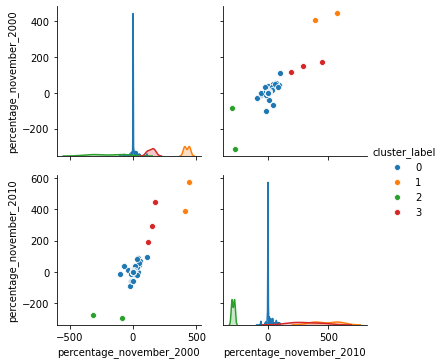

In [145]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_november_2000', 'percentage_november_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_november_2000', 'percentage_november_2010'])
data_plot

In [146]:
cluster_means = []

percentage_november_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_november_2000'].mean())
percentage_november_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_november_2010'].mean())

df_cluster_means = percentage_november_2000_mean.merge(percentage_november_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_november_2000  percentage_november_2010
cluster_label                                                    
0                              3.928874                  5.491338
1                            426.923099                482.384036
2                           -200.019495               -284.142801
3                            145.187228                310.558057


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
35,CHN,2.807923,2.439087,2.027337,2.101854,2.177876,3.307415,-315.435411,-273.791432,3.240383,2.104703,-7.279847,2.873983,2
101,LIE,11.911341,10.643766,5.058448,7.425491,-5.372026,2.995075,-84.603580,-294.494171,27.529588,-41.381250,22.062754,-4.518180,2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


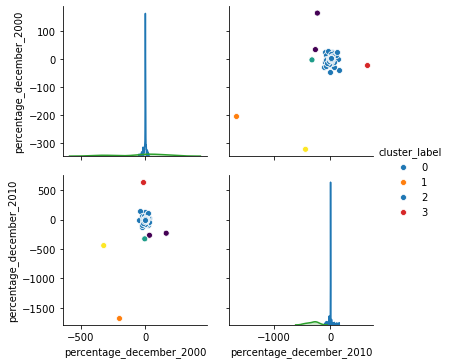

In [147]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_december_2000', 'percentage_december_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_december_2000', 'percentage_december_2010'])
data_plot

In [148]:
percentage_december_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_december_2000'].mean())
percentage_december_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_december_2010'].mean())

df_cluster_means = percentage_december_2000_mean.merge(percentage_december_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_december_2000  percentage_december_2010
cluster_label                                                    
0                              0.393196                  1.404352
1                           -203.422736              -1674.489622
2                            -32.603537               -317.195485
3                            -21.022917                640.310623


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
45,CZE,4.073630,5.053395,4.526208,6.105571,0.611700,3.323031,50.948268,70.136591,33.065620,-267.090993,56.479308,-49.946879,2
139,POL,2.161811,5.106561,6.462820,6.073817,3.197173,3.966779,56.012028,70.668502,-3.669038,-327.758115,71.985596,10.339557,2
170,CHE,9.918634,8.976592,4.116744,5.288507,-4.338167,1.532849,31.325949,82.746265,163.513863,-232.096223,45.855697,-43.165184,2
189,UZB,1.386183,4.633705,-0.128464,2.128937,2.366723,3.965122,30.207218,-22.148632,-323.324595,-441.836611,7.152470,-35.611545,2


In [149]:
# Analysis of Rainfall Patterns begin hereafter

In [150]:
rainfall.head()

,Rainfall - (MM),Year,Statistics,Country,Code
0,64.7765,1991,Jan Average,Afghanistan,AFG
1,59.4025,1991,Feb Average,Afghanistan,AFG
2,119.6250,1991,Mar Average,Afghanistan,AFG
3,51.8025,1991,Apr Average,Afghanistan,AFG
4,57.2438,1991,May Average,Afghanistan,AFG


In [151]:
rainfall['Code'] = rainfall['Code'].apply(lambda x: x.strip())
rainfall[' Year'] = rainfall[' Year'].astype('int')
rainfall[' Statistics'] = rainfall[' Statistics'].apply(lambda x: str(x).strip())

In [152]:
# Analyze % change in temperature data for January for the last 3 decades
rainfall.columns

country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']

june_1990 = []
june_2000 = []
june_2010 = []

percentage_june_2000 = []
percentage_june_2010 = []

july_1990 = []
july_2000 = []
july_2010 = []

percentage_july_2000 = []
percentage_july_2010 = []

august_1990 = []
august_2000 = []
august_2010 = []

percentage_august_2000 = []
percentage_august_2010 = []

november_1990 = []
november_2000 = []
november_2010 = []

percentage_november_2000 = []
percentage_november_2010 = []

december_1990 = []
december_2000 = []
december_2010 = []

percentage_december_2000 = []
percentage_december_2010 = []

january_1990 = []
january_2000 = []
january_2010 = []

percentage_january_2000 = []
percentage_january_2010 = []

for each_country in country_code_for_analysis:
    for month in months:
        m1 = rainfall[
            (rainfall[' Statistics'] == str(month) + ' Average') &  
            (rainfall['Code'] == each_country) & 
            (rainfall[' Year']  >1989) &
            (rainfall[' Year']  < 2001)]['Rainfall - (MM)'].mean()

        m2 = rainfall[
            (rainfall[' Statistics'] == str(month) + ' Average') &  
            (rainfall['Code'] == each_country) & 
            (rainfall[' Year']  > 2000) &
            (rainfall[' Year']  < 2011)]['Rainfall - (MM)'].mean()

        m3 = rainfall[
            (rainfall[' Statistics'] == str(month) + ' Average') &  
            (rainfall['Code'] == each_country) & 
            (rainfall[' Year']  > 2010) &
            (rainfall[' Year']  < 2020)]['Rainfall - (MM)'].mean()
        
        if month == 'Jun':
            june_1990.append(m1)
            june_2000.append(m2)
            june_2010.append(m3)
            
            percentage_june_2000.append((m2-m1)/m1*100)            
            percentage_june_2010.append((m3-m1)/m1*100)
        
        if month == 'Jul':
            july_1990.append(m1)
            july_2000.append(m2)
            july_2010.append(m3)
            
            percentage_july_2000.append((m2-m1)/m1*100)            
            percentage_july_2010.append((m3-m1)/m1*100)
        
        if month == 'Aug':            
            august_1990.append(m1)
            august_2000.append(m2)
            august_2010.append(m3)
            
            percentage_august_2000.append((m2-m1)/m1*100)            
            percentage_august_2010.append((m3-m1)/m1*100)
        
        if month == 'Nov':
            november_1990.append(m1)
            november_2000.append(m2)
            november_2010.append(m3)
            
            percentage_november_2000.append((m2-m1)/m1*100)            
            percentage_november_2010.append((m3-m1)/m1*100)
        
        if month == 'Dec':
            december_1990.append(m1)
            december_2000.append(m2)
            december_2010.append(m3)
            
            percentage_december_2000.append((m2-m1)/m1*100)            
            percentage_december_2010.append((m3-m1)/m1*100)
            
        if month == 'Jan':
            january_1990.append(m1)
            january_2000.append(m2)
            january_2010.append(m3)
            
            percentage_january_2000.append((m2-m1)/m1*100)            
            percentage_january_2010.append((m3-m1)/m1*100)


data_stats = {
    'country': country_code_for_analysis,
    'june_1990': june_1990, 
    'june_2000': june_2000, 
    'june_2010': june_2010, 
    'july_1990': july_1990, 
    'july_2000': july_2000,
    'july_2010': july_2010, 
    'august_1990': august_1990, 
    'august_2000': august_2000, 
    'august_2010': august_2010, 
    'november_1990':november_1990,
    'november_2000':november_2000,
    'november_2010':november_2010,
    'december_1990': december_1990,
    'december_2000': december_2000,
    'december_2010': december_2010,
    'january_1990': january_1990, 
    'january_2000': january_2000,
    'january_2010': january_2010
}

df_stat = pd.DataFrame(data=data_stats)

data_percentage ={
    'country': country_code_for_analysis,
    'percentage_june_2000': percentage_june_2000, 
    'percentage_june_2010': percentage_june_2010, 
    'percentage_july_2000': percentage_july_2000, 
    'percentage_july_2010': percentage_july_2010, 
    'percentage_august_2000': percentage_august_2000, 
    'percentage_august_2010': percentage_august_2010, 
    'percentage_november_2000':percentage_november_2000,
    'percentage_november_2010':percentage_november_2010,
    'percentage_december_2000': percentage_december_2000,
    'percentage_december_2010': percentage_december_2010,
    'percentage_january_2000': percentage_january_2000,
    'percentage_january_2010': percentage_january_2010
}

df_percentage = pd.DataFrame(data=data_percentage)

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', 'Code'], dtype='object')

<ipython-input-152-121ff45715f7>:82: RuntimeWarning: invalid value encountered in double_scalars
  percentage_july_2000.append((m2-m1)/m1*100)
<ipython-input-152-121ff45715f7>:83: RuntimeWarning: invalid value encountered in double_scalars
  percentage_july_2010.append((m3-m1)/m1*100)


In [153]:
df_percentage_subset = df_percentage[[
       'country', 
       'percentage_june_2000', 'percentage_june_2010',
       'percentage_july_2000', 'percentage_july_2010',
       'percentage_august_2000', 'percentage_august_2010',
       'percentage_november_2000', 'percentage_november_2010',
       'percentage_december_2000', 'percentage_december_2010',
       'percentage_january_2000', 'percentage_january_2010'
]]

# df_stat_subset[df_stat_subset.isna().any(axis=1)]
df_percentage_subset = df_percentage_subset.dropna()

df_percentage_subset.head()

,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010
0,AFG,3.888255,-20.584952,6.362559,-14.514028,49.182706,70.926766,28.894427,108.733684,38.423828,-13.508513,-8.054398,-28.476158
1,ALB,44.629454,57.824826,-9.223883,-21.286319,-2.353005,-35.584549,-18.917279,-23.097617,5.324408,-30.379698,46.822962,40.910538
2,DZA,-17.995947,-3.383681,56.560008,4.968516,22.681345,18.218087,22.498327,24.491267,30.844348,-14.967411,11.964593,-23.678366
3,AND,-38.448142,-24.933908,-2.300403,59.545036,-5.808437,-16.687957,-26.760395,32.405308,-31.442160,-70.156334,0.653928,-18.137281
4,AGO,100.734301,49.674876,7.662376,-5.898683,28.185162,2.397762,6.524026,3.243526,-2.182594,15.820816,-1.300127,-9.457844


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_august_2000  percentage_august_2010
cluster_label                                                
0                            0.253913               -2.906159
1                         3854.486061              298.412912
2                          358.944460              427.414585
3                           50.614526               49.814792


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
22,BWA,244.368755,284.930996,-55.123082,76.245862,474.035329,553.776713,-3.340404,-24.189784,-4.205337,9.799995,-1.772671,-13.073931,2
97,LBN,-33.251834,-33.151419,105.717220,141.717068,243.853591,301.052457,-10.509738,1.770196,-6.410057,8.785354,-2.312987,13.912956,2


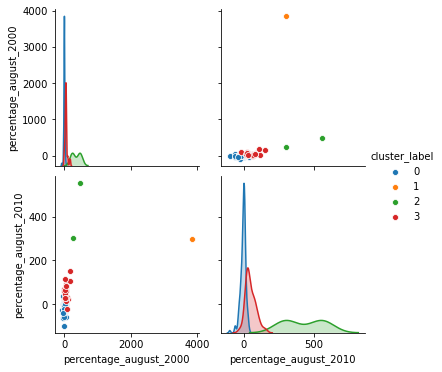

In [154]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_august_2000', 'percentage_august_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_august_2000', 'percentage_august_2010'])
data_plot

percentage_august_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_august_2000'].mean())
percentage_august_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_august_2010'].mean())

df_cluster_means = percentage_august_2000_mean.merge(percentage_august_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_august_2000  percentage_july_2010
cluster_label                                              
0                            0.253913             29.539098
1                         3854.486061            393.867994
2                          358.944460            142.346764
3                           50.614526             -9.563156


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
97,LBN,-33.251834,-33.151419,105.717220,141.717068,243.853591,301.052457,-10.509738,1.770196,-6.410057,8.785354,-2.312987,13.912956,2
147,RWA,-22.466202,52.703562,117.406219,222.096795,-27.088384,4.540158,1.414768,32.144893,0.629328,15.559819,24.169733,-11.228010,2
171,SYR,-3.309252,32.402339,63.161655,109.420962,23.617770,114.433480,-8.830647,-14.579992,-11.476290,16.678301,-7.606247,8.983215,2
175,TLS,-16.944154,-13.520648,97.256297,96.152231,-85.186204,-28.146189,6.518847,-0.269331,-12.277166,-13.609573,-41.403721,-19.388789,2


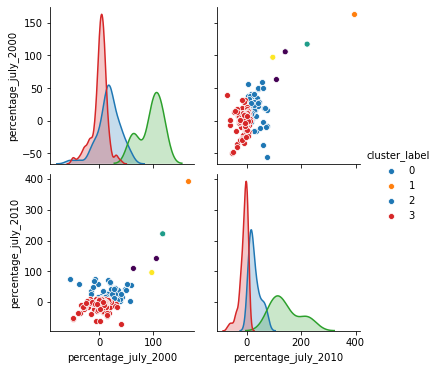

In [155]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_july_2000', 'percentage_july_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_july_2000', 'percentage_july_2010'])
data_plot

percentage_july_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_july_2000'].mean())
percentage_july_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_july_2010'].mean())

df_cluster_means = percentage_august_2000_mean.merge(percentage_july_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_november_2000  percentage_november_2010
cluster_label                                                    
0                             -7.809048                -17.639838
1                             25.383621                144.314699
2                             11.814574                 23.264381
3                            227.549817                118.366545


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
2,DZA,-17.995947,-3.383681,56.560008,4.968516,22.681345,18.218087,22.498327,24.491267,30.844348,-14.967411,11.964593,-23.678366,2
3,AND,-38.448142,-24.933908,-2.300403,59.545036,-5.808437,-16.687957,-26.760395,32.405308,-31.442160,-70.156334,0.653928,-18.137281,2
4,AGO,100.734301,49.674876,7.662376,-5.898683,28.185162,2.397762,6.524026,3.243526,-2.182594,15.820816,-1.300127,-9.457844,2
14,BRB,19.057445,-25.700204,8.218486,-6.819771,9.932971,6.472905,14.629724,6.544097,-14.916741,38.639295,27.094158,7.581726,2
15,BLR,-5.746080,-10.822273,9.504901,5.367668,45.200107,18.014096,6.309952,9.343228,-6.338782,8.484134,24.683034,49.657686,2


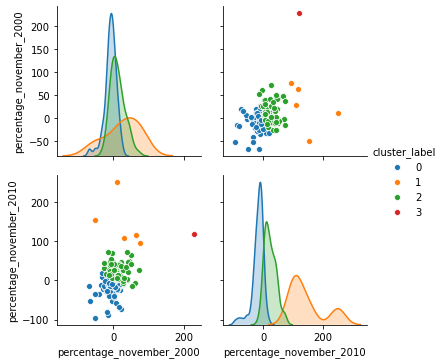

In [156]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_november_2000', 'percentage_november_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_november_2000', 'percentage_november_2010'])
data_plot

percentage_november_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_november_2000'].mean())
percentage_november_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_november_2010'].mean())

df_cluster_means = percentage_november_2000_mean.merge(percentage_november_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<ipython-input-157-2a515b11f4aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percentage_subset['cluster_label'] = k_means.labels_
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_december_2000  percentage_december_2010
cluster_label                                                    
0                             -4.792165                 15.897419
1                             -4.285691                -23.985647
2                             35.877615                 24.408131
3                            233.212599                 43.543971


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
0,AFG,3.888255,-20.584952,6.362559,-14.514028,49.182706,70.926766,28.894427,108.733684,38.423828,-13.508513,-8.054398,-28.476158,2
29,CMR,3.487662,-0.582528,7.514079,-32.435069,-10.362235,-1.293744,-2.173464,-4.676451,24.395347,24.598003,8.082311,-23.199276,2
31,CPV,11.111111,11.111111,31.963970,31.963970,-4.801568,-8.859054,227.549817,118.366545,64.736699,9.824466,225.104295,67.337501,2
32,CAF,-14.444001,-2.758459,1.909833,0.706389,-5.259092,4.759146,5.116506,3.373619,43.385526,75.233289,28.620608,-10.593244,2
36,COL,18.169933,-14.957601,6.706241,-18.044783,7.992062,-2.767862,12.118742,-10.121015,24.975265,8.020512,-5.325534,-9.184570,2


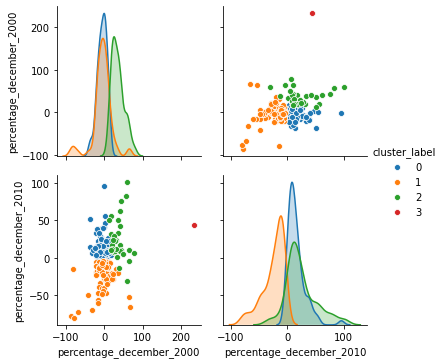

In [157]:
df_percentage_subset = df_percentage_subset[df_percentage_subset['percentage_december_2010']< 400]

k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)

k_means.fit(df_percentage_subset[[
        'percentage_december_2000', 'percentage_december_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_december_2000', 'percentage_december_2010'])
data_plot

percentage_december_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_december_2000'].mean())
percentage_december_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_december_2010'].mean())

df_cluster_means = percentage_december_2000_mean.merge(percentage_december_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_january_2000  percentage_january_2010
cluster_label                                                  
0                             6.005931                 5.818748
1                            41.155932                58.386294
2                           -15.183623               -30.476306
3                           225.104295                67.337501


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
0,AFG,3.888255,-20.584952,6.362559,-14.514028,49.182706,70.926766,28.894427,108.733684,38.423828,-13.508513,-8.054398,-28.476158,2
2,DZA,-17.995947,-3.383681,56.560008,4.968516,22.681345,18.218087,22.498327,24.491267,30.844348,-14.967411,11.964593,-23.678366,2
3,AND,-38.448142,-24.933908,-2.300403,59.545036,-5.808437,-16.687957,-26.760395,32.405308,-31.442160,-70.156334,0.653928,-18.137281,2
5,ATG,43.366153,-20.104163,24.477551,11.926808,53.428791,18.800103,-6.826765,-6.959992,-9.656793,-2.817191,4.742473,-27.942855,2
11,The,-10.473264,-13.676041,19.460255,13.701330,-10.618545,15.851484,-19.253165,-25.599711,12.305062,-9.448640,-26.328822,-20.283440,2


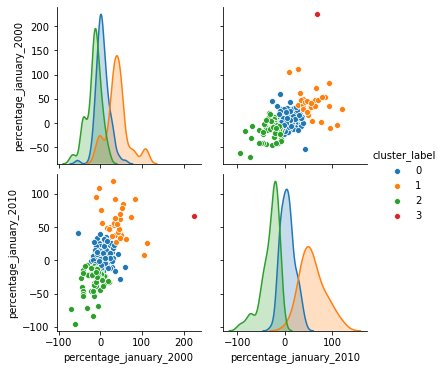

In [158]:
df_percentage_subset = df_percentage_subset[df_percentage_subset['percentage_january_2010']< 400]

k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)

k_means.fit(df_percentage_subset[[
        'percentage_january_2000', 'percentage_january_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_january_2000', 'percentage_january_2010'])
data_plot

percentage_january_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_january_2000'].mean())
percentage_january_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_january_2010'].mean())

df_cluster_means = percentage_january_2000_mean.merge(percentage_january_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

In [159]:
# Regression Analysis and Prediction starts below
'''
    Temperature = CO2 + NO2 + Methane + Forest Area
    Rainfall = CO2 + NO2 + Methane + Forest Area

'''

'\n    Temperature = CO2 + NO2 + Methane + Forest Area\n    Rainfall = CO2 + NO2 + Methane + Forest Area\n\n'

In [160]:
## TEST CODE ###
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)
print(regr.feature_importances_)

[0.18146984 0.81473937 0.00145312 0.00233767]
print(regr.predict([[0, 0, 0, 0]]))

## END TEST CODE ###

SyntaxError: invalid syntax (<ipython-input-160-3f96df811d96>, line 12)

In [161]:
# Effect Mining: Socio-economic analysis
# Analyze Temperature, Rainfall dataset to the land area
# Analyze Temperature, Rainfall dataset to the forest area
# Analyze Temperature, Rainfall dataset to the agricultural production
# Analyze Temperature, Rainfall dataset to the Agriculture, Forestry and Fishing value contribution to the GDP
# Deaths by Communicable Diseases
# Employment in Agriculture

# '''
#     Cause Factors for Analysis:
#         SF6 gas emissions (thousand metric tons of CO2 equivalent)
#         PFC gas emissions (thousand metric tons of CO2 equivalent)
#         Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
#         Methane emissions (kt of CO2 equivalent)
#         HFC gas emissions (thousand metric tons of CO2 equivalent)
#         CO2 emissions (kt)
#         Electric power consumption (kWh per capita)
# '''

# '''
#         Population growth (annual %)
#         Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
#         Mortality rate, under-5 (per 1,000 live births)
#         Agriculture, forestry, and fishing, value added (% of GDP)
#         Droughts, floods, extreme temperatures (% of population, average 1990-2009)
#         Cereal yield (kg per hectare)
#         Agricultural irrigated land (% of total agricultural land)
#         Forest area (sq. km)
#         Agricultural land (sq. km)
# '''


In [162]:
new_indicators.head()
rainfall_with_indicators = rainfall.merge(
    new_indicators, left_on=['Code', ' Year'], 
    right_on=['Country Code', 'Year'], 
    how='inner'
)

,Country Name,Country Code,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,Aruba,ABW,3.902018,NaN,NaN,NaN,NaN,11.862274,15.4860,1683.153,NaN,NaN,NaN,4.2,20.0,1991
1,Aruba,ABW,5.440272,NaN,NaN,NaN,NaN,12.133462,15.8980,1463.133,NaN,NaN,NaN,4.2,20.0,1992
2,Aruba,ABW,6.068410,NaN,NaN,NaN,NaN,12.684115,16.3861,1595.145,NaN,NaN,NaN,4.2,20.0,1993
3,Aruba,ABW,5.625998,NaN,NaN,NaN,NaN,13.239976,16.8768,1613.480,NaN,NaN,NaN,4.2,20.0,1994
4,Aruba,ABW,4.616675,NaN,NaN,0.505997,NaN,13.292831,17.2964,1668.485,NaN,NaN,NaN,4.2,20.0,1995


In [200]:
temperature.columns
rainfall_with_indicators.columns

temperature['Country Code'] = temperature['Country Code'].apply(lambda x: x.strip())
temperature[' Statistics'] = temperature[' Statistics'].apply(lambda x: str(x).strip())
temperature[' Year'] = temperature[' Year'].apply(lambda x: str(int(x)))
 
rainfall_with_indicators['Code'] = rainfall_with_indicators['Country Code'].apply(lambda x: x.strip())
rainfall_with_indicators[' Statistics'] = rainfall_with_indicators[' Statistics'].apply(lambda x: str(x).strip())
rainfall_with_indicators[' Year'] = rainfall_with_indicators[' Year'].apply(lambda x: str(int(x)))

temperature_and_rainfall = temperature.merge(
    rainfall_with_indicators, 
    left_on=['Country Code', ' Year', ' Statistics'], 
    right_on=['Code', ' Year', ' Statistics'], 
    how='inner'
)

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country',
       'Country Code'],
      dtype='object')

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', 'Code',
       'Country Name', 'Country Code', 'Population growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)',
       'Energy use (kg of oil equivalent per capita)',
       'Cereal yield (kg per hectare)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Forest area (sq. km)', 'Agricultural land (sq. km)', 'Year'],
      dtype='object')

In [201]:
temperature_and_rainfall.head()

,Temperature - (Celsius),Year,Statistics,Country_x,Country Code_x,Rainfall - (MM),Country_y,Code,Country Name,Country Code_y,...,"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,-0.03110,1991,Jan Average,Afghanistan,AFG,64.7765,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
1,1.43654,1991,Feb Average,Afghanistan,AFG,59.4025,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
2,6.88685,1991,Mar Average,Afghanistan,AFG,119.6250,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
3,12.93970,1991,Apr Average,Afghanistan,AFG,51.8025,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
4,17.07550,1991,May Average,Afghanistan,AFG,57.2438,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991


In [202]:
temperature_subset_for_analysis = temperature_and_rainfall[['Temperature - (Celsius)', ' Year', ' Statistics', 'Country Name',
       'Code', 'Population growth (annual %)']]

In [203]:
temperature_subset_for_analysis.columns
temperature_subset_for_analysis.head()

Index(['Temperature - (Celsius)', ' Year', ' Statistics', 'Country Name',
       'Code', 'Population growth (annual %)'],
      dtype='object')

,Temperature - (Celsius),Year,Statistics,Country Name,Code,Population growth (annual %)
0,-0.03110,1991,Jan Average,Afghanistan,AFG,6.900156
1,1.43654,1991,Feb Average,Afghanistan,AFG,6.900156
2,6.88685,1991,Mar Average,Afghanistan,AFG,6.900156
3,12.93970,1991,Apr Average,Afghanistan,AFG,6.900156
4,17.07550,1991,May Average,Afghanistan,AFG,6.900156


In [204]:
# Task - Calculate % change in temperature for decade from monthly data for a year

In [205]:
# With change is the temperature how is population growth is changing
temperature_subset_pivoted = temperature_and_rainfall.pivot_table(
    index=[' Year', 'Country Name', 'Code', 'Population growth (annual %)'],
    columns=' Statistics', values='Temperature - (Celsius)', aggfunc='first').reset_index()
temperature_subset_pivoted_and_sorted = temperature_subset_pivoted.sort_values(['Code', ' Year'])

In [206]:
temperature_subset_pivoted_and_sorted.head()

Statistics,Year,Country Name,Code,Population growth (annual %),Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average
0,1991,Afghanistan,AFG,6.900156,12.9397,23.9673,4.23571,1.43654,-0.03110,25.5710,23.0777,6.88685,17.0755,7.31675,12.8779,19.3800
191,1992,Afghanistan,AFG,8.546120,11.6926,22.8633,4.47636,2.46018,0.74637,24.7068,22.8875,5.71341,16.1108,8.32035,12.6981,17.8588
382,1993,Afghanistan,AFG,8.790889,13.3735,23.3201,3.32008,4.33465,-0.08350,24.6320,22.8880,6.12034,18.7452,7.40369,12.0373,19.6343
573,1994,Afghanistan,AFG,7.659777,11.9926,24.5555,2.50841,1.14112,1.11415,25.0045,23.8788,8.97734,18.6745,9.50640,12.5059,17.1010
764,1995,Afghanistan,AFG,5.884257,12.2676,24.3760,1.76217,2.96133,0.92358,25.7798,23.4941,6.36893,18.1187,7.86943,13.5466,19.0225


In [207]:
temperature_subset_pivoted_and_sorted['avg'] = temperature_subset_pivoted_and_sorted.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)
temperature_subset_pivoted_and_sorted['Monthly Population Growth'] = temperature_subset_pivoted_and_sorted['Population growth (annual %)']/12
temperature_subset_pivoted_and_sorted[temperature_subset_pivoted_and_sorted['Code']=='AFG'].head()

Statistics,Year,Country Name,Code,Population growth (annual %),Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average,avg,Monthly Population Growth
0,1991,Afghanistan,AFG,6.900156,12.9397,23.9673,4.23571,1.43654,-0.03110,25.5710,23.0777,6.88685,17.0755,7.31675,12.8779,19.3800,12.894487,0.575013
191,1992,Afghanistan,AFG,8.546120,11.6926,22.8633,4.47636,2.46018,0.74637,24.7068,22.8875,5.71341,16.1108,8.32035,12.6981,17.8588,12.544548,0.712177
382,1993,Afghanistan,AFG,8.790889,13.3735,23.3201,3.32008,4.33465,-0.08350,24.6320,22.8880,6.12034,18.7452,7.40369,12.0373,19.6343,12.977138,0.732574
573,1994,Afghanistan,AFG,7.659777,11.9926,24.5555,2.50841,1.14112,1.11415,25.0045,23.8788,8.97734,18.6745,9.50640,12.5059,17.1010,13.080018,0.638315
764,1995,Afghanistan,AFG,5.884257,12.2676,24.3760,1.76217,2.96133,0.92358,25.7798,23.4941,6.36893,18.1187,7.86943,13.5466,19.0225,13.040895,0.490355


Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Temperature')

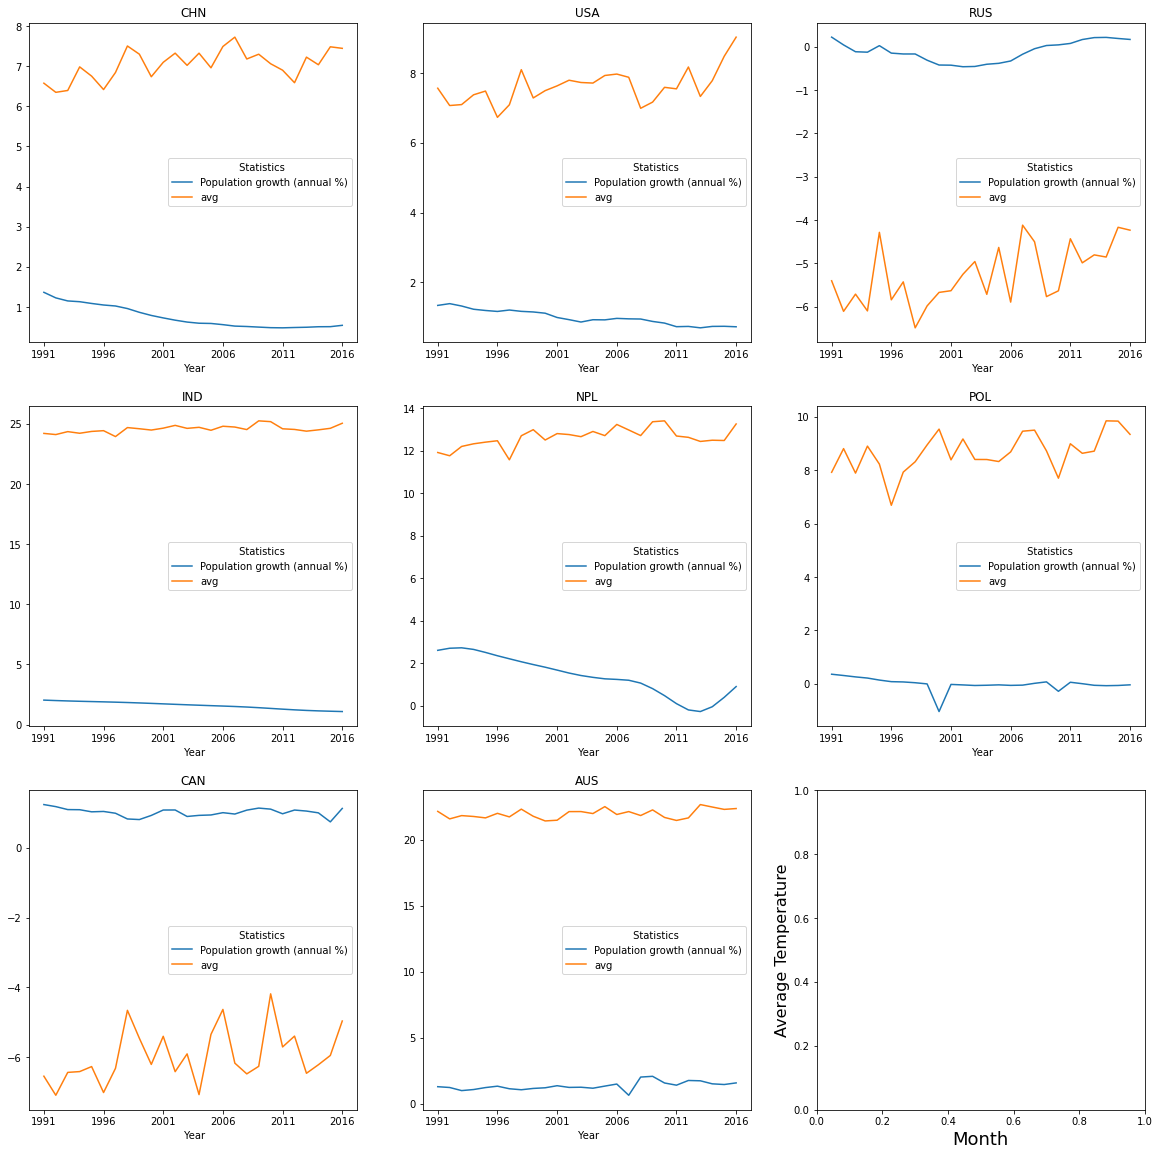

In [177]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Month', fontsize=18)
plt.ylabel('Average Temperature', fontsize=16)

country_code_for_analysis = ['CHN', 'USA', 'RUS', 'IND', 'NPL', 'POL', 'CAN', 'AUS']

for i in range(len(country_code_for_analysis)):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [' Year', 'Population growth (annual %)', 'avg']][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])

In [ ]:
# Cluster analysis of the countries with respect to temperature change and population growth here


In [212]:
temperature_subset_for_analysis = temperature_and_rainfall[['Temperature - (Celsius)', ' Year', ' Statistics', 'Country Name',
       'Code', 'Cereal yield (kg per hectare)']]

# With change is the temperature how is population growth is changing
temperature_subset_pivoted = temperature_subset_for_analysis.pivot_table(
    index=[' Year', 'Country Name', 'Code', 'Cereal yield (kg per hectare)'],
    columns=' Statistics', values='Temperature - (Celsius)', aggfunc='first').reset_index()
temperature_subset_pivoted_and_sorted = temperature_subset_pivoted.sort_values(['Code', ' Year'])

In [213]:
temperature_subset_pivoted_and_sorted['avg'] = temperature_subset_pivoted_and_sorted.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)
temperature_subset_pivoted_and_sorted['Cereal yield(ton per hectare)'] = temperature_subset_pivoted_and_sorted['Cereal yield (kg per hectare)']/1000
temperature_subset_pivoted_and_sorted[temperature_subset_pivoted_and_sorted['Code']=='AFG'].head()

Statistics,Year,Country Name,Code,Cereal yield (kg per hectare),Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average,avg,Cereal yield(ton per hectare)
0,1991,Afghanistan,AFG,1160.4,12.9397,23.9673,4.23571,1.43654,-0.03110,25.5710,23.0777,6.88685,17.0755,7.31675,12.8779,19.3800,12.894487,1.1604
144,1992,Afghanistan,AFG,1097.8,11.6926,22.8633,4.47636,2.46018,0.74637,24.7068,22.8875,5.71341,16.1108,8.32035,12.6981,17.8588,12.544548,1.0978
307,1993,Afghanistan,AFG,1132.9,13.3735,23.3201,3.32008,4.33465,-0.08350,24.6320,22.8880,6.12034,18.7452,7.40369,12.0373,19.6343,12.977138,1.1329
474,1994,Afghanistan,AFG,1140.4,11.9926,24.5555,2.50841,1.14112,1.11415,25.0045,23.8788,8.97734,18.6745,9.50640,12.5059,17.1010,13.080018,1.1404
641,1995,Afghanistan,AFG,1214.5,12.2676,24.3760,1.76217,2.96133,0.92358,25.7798,23.4941,6.36893,18.1187,7.86943,13.5466,19.0225,13.040895,1.2145


In [219]:
# Cluster Analysis of change in cereal production in the last 2 decades
# Analyze % change in temperature data for January for the last 3 decades

temperature_subset_pivoted_and_sorted.columns
country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']
temperature_subset_pivoted_and_sorted[' Year'] = temperature_subset_pivoted_and_sorted[' Year'].astype('int')
cereal_1990 = []
cereal_2000 = []
cereal_2010 = []

percentage_change_cereal_2000 = []
percentage_change_cereal_2010 = []

for each_country in country_code_for_analysis:
    m1 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  >1989) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2001)]['Cereal yield(ton per hectare)'].mean()

    m2 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2000) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2010)]['Cereal yield(ton per hectare)'].mean()
    
    m3 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2010) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2021)]['Cereal yield(ton per hectare)'].mean()
    
    cereal_1990.append(m1)
    cereal_2000.append(m2)
    cereal_2010.append(m3)
    percentage_change_cereal_2000.append((m2-m1)/m1*100)            
    percentage_change_cereal_2010.append((m3-m1)/m1*100)

data_stats = {
    'country': country_code_for_analysis,
    'cereal_1990': cereal_1990,
    'cereal_2000': cereal_2000,
    'cereal_2010': cereal_2010,
    'percentage_change_cereal_2000': percentage_change_cereal_2000,
    'percentage_change_cereal_2010': percentage_change_cereal_2010
}

df_stat = pd.DataFrame(data=data_stats)
df_stat.head()

Index([' Year', 'Country Name', 'Code', 'Cereal yield (kg per hectare)',
       'Apr Average', 'Aug Average', 'Dec Average', 'Feb Average',
       'Jan Average', 'Jul Average', 'Jun Average', 'Mar Average',
       'May Average', 'Nov Average', 'Oct Average', 'Sep Average', 'avg',
       'Cereal yield(ton per hectare)'],
      dtype='object', name=' Statistics')

,country,cereal_1990,cereal_2000,cereal_2010,percentage_change_cereal_2000,percentage_change_cereal_2010
0,AFG,1.17792,1.580311,1.978350,34.161158,67.952832
1,ALB,2.63474,3.573811,4.844517,35.641889,83.870768
2,DZA,0.92956,1.325089,1.487300,42.550119,60.000430
3,AND,NaN,NaN,NaN,NaN,NaN
4,AGO,0.48894,0.563122,0.805533,15.172050,64.750958


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_change_cereal_2000  percentage_change_cereal_2010
cluster_label                                                              
0                                  27.845341                      67.168331
1                                  14.561502                      28.328388
2                                 206.191675                     441.285605
3                                  -6.068130                      -7.141096
4                                  73.787138                     141.246451


,country,cereal_1990,cereal_2000,cereal_2010,percentage_change_cereal_2000,percentage_change_cereal_2010,cluster_label
0,AFG,1.177920,1.580311,1.978350,34.161158,67.952832,0
1,ALB,2.634740,3.573811,4.844517,35.641889,83.870768,0
2,DZA,0.929560,1.325089,1.487300,42.550119,60.000430,0
4,AGO,0.488940,0.563122,0.805533,15.172050,64.750958,0
6,ARG,3.044180,3.679956,4.728333,20.884953,55.323711,0
7,ARM,1.666833,2.049089,2.983633,22.933040,79.000100,0
10,AZE,1.792844,2.624978,2.711400,46.414140,51.234537,0
13,BGD,2.767100,3.707456,4.493250,33.983432,62.381193,0
15,BLR,2.200167,2.788344,3.391050,26.733328,54.126960,0
22,BWA,0.300450,0.508344,0.459067,69.194357,52.793033,0


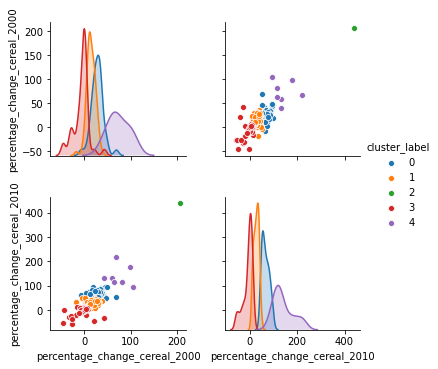

In [236]:
k_means = cluster.KMeans(n_clusters=5, max_iter = 200000)
df_stat = df_stat.dropna()
k_means.fit(df_stat[[
        'percentage_change_cereal_2000', 'percentage_change_cereal_2010']])

df_stat['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_stat, hue='cluster_label', vars =['percentage_change_cereal_2000', 'percentage_change_cereal_2010'])
data_plot

df_stat_2000_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['percentage_change_cereal_2000'].mean())
df_stat_2010_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['percentage_change_cereal_2010'].mean())

df_cluster_means = df_stat_2000_mean.merge(df_stat_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)

In [237]:
df_stat[df_stat['cluster_label']==3].head(10)

,country,cereal_1990,cereal_2000,cereal_2010,percentage_change_cereal_2000,percentage_change_cereal_2010,cluster_label
5,ATG,1.66492,1.595633,1.592050,-4.161561,-4.376787,3
8,AUS,1.87601,1.673989,2.084283,-10.768659,11.101931,3
14,BRB,2.62885,2.687978,2.886217,2.249188,9.790086,3
24,BRN,1.35479,0.743700,1.334983,-45.105884,-1.461973,3
27,BDI,1.33950,1.300444,1.249700,-2.915682,-6.703994,3
31,CPV,0.39897,0.292756,0.174183,-26.622163,-56.341747,3
37,COM,1.29632,1.307811,1.352117,0.886441,4.304236,3
38,COD,0.79019,0.773322,0.771083,-2.134648,-2.417984,3
40,CRI,3.58262,3.506122,3.778533,-2.135247,5.468437,3
44,CYP,1.97363,1.625956,1.575333,-17.615989,-20.180919,3


Text(0.5, 0, 'Year')

Text(0, 0.5, '')

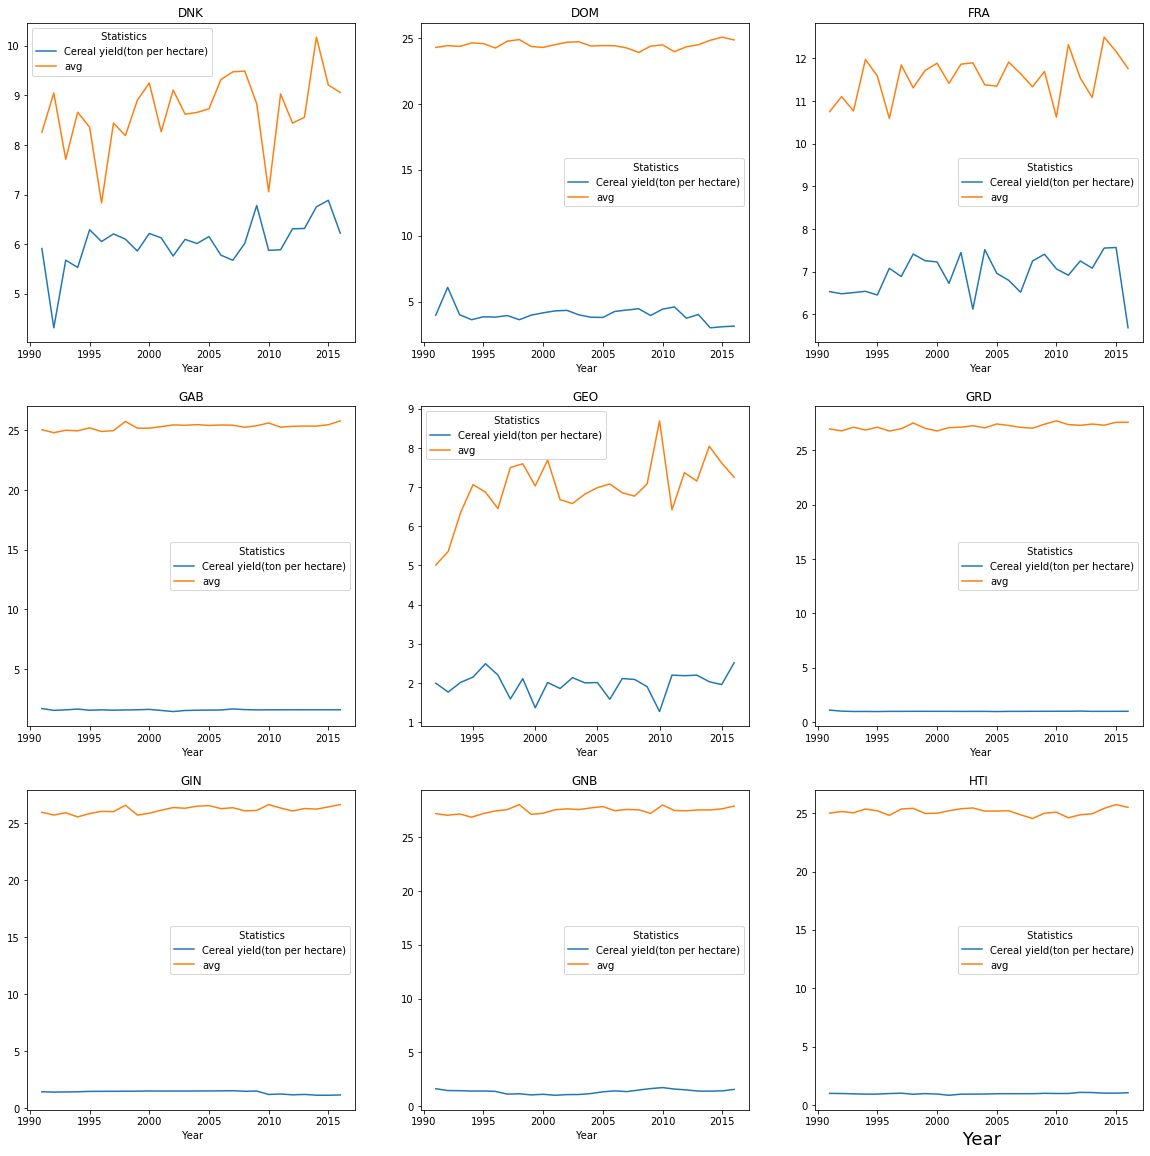

In [239]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=16)

country_code_for_analysis = list(df_stat[df_stat['cluster_label']==3]['country'])[10:19]

for i in range(len(country_code_for_analysis)):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [' Year', 'Cereal yield(ton per hectare)', 'avg']][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])